Regresion lineal 

Y=wX+B

Y --> Variable dependiente

X --> Variable independiente

W --> weight

b --> bias


Gradiente descendiente: es un tipo de optimizacion usado en machine learning para minimizar la funcion de perdida en varios algoritmos. Es usado par aactualizar los parametros del modelo. 

w=w-Ldw

b=b-Ldb

Learning rate: 

Es un parametro de ajuste en un algoritmo de optimizacion que determina la longitud del paso de un punto hacia su punto optimo




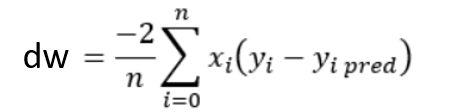


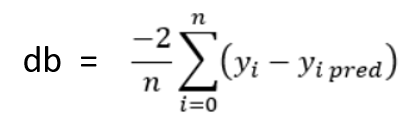

In [116]:
import numpy as np


In [117]:
class Linear_Regression:
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations   #esta es la parte constructora
        #estos son los hyperparametros

        #ya aqui estan los metodos

    def fit(self,X,Y):
        #numero de ejemplos de entrenamiento y numero de caracteristicas
        self.m,self.n=X.shape    #numero de filas y de columnas

        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y

        #Implementando el gradiente descendiente
        for i in range(self.no_of_iterations):
            self.update_weight()

    def update_weight(self):
        Y_prediction=self.predict(self.X)
        #calculamos los gradientes
        dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m     #la T es para la transpuesta

        db=-2*np.sum(self.Y-Y_prediction)/self.m


        #actualizando los pesos
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db


    def predict(self,X):
        return X.dot(self.w)+self.b

In [118]:
#usando la regresion lineal para el modelo 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [119]:
data=pd.read_csv('.\salary_data.csv')
data.shape




(30, 2)

In [120]:
#preprocesacimiento de los datos
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [121]:
#separamos los datos
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [122]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [123]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [124]:
#Separamos los datos en entrenamiento y prueba
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=2)


In [125]:
#Entrenamos el modelo de regresion lineal
model=Linear_Regression(learning_rate=0.02,no_of_iterations=20000)

In [126]:
model.fit(X_train,Y_train)

In [131]:
#imprimiendo los pesos y el sesgo

print("weight= ", model.w[0].round(2))
print("Bias =", model.b.round(2))

weight=  9512.94
Bias = 23707.81


y=9514.4(X)+23697.41

Salario=9514(Experiencia)+23697

In [128]:
test_data_prediction=model.predict(X_test)


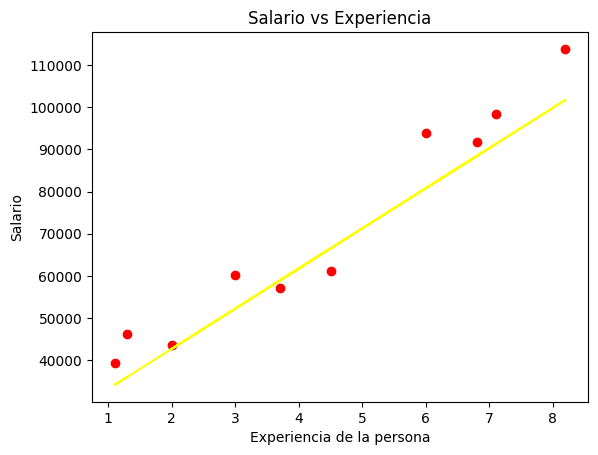

In [129]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='yellow')
plt.xlabel("Experiencia de la persona")
plt.ylabel("Salario")
plt.title("Salario vs Experiencia")
plt.show()